In [8]:
import pandas as pd
import csv,os
import time
from datetime import datetime, date, time, timedelta
import seaborn as sns

In [9]:
#Define you directory
data_dir = '/Users/nirajkulkarni/Desktop/Niraj/ISB-CBA/Capstone/data/'

summarized_data_file = 'summarized_data-1.csv'

In [10]:
#read the data
summarized_data = pd.read_csv(data_dir + summarized_data_file)
summarized_data.head(3)

/Users/nirajkulkarni/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Col_PK,Item_No,Location_Code,Purchase_MRP,Prevailing_MRP_as_on_Stock_Date,State,Region,Stock_Quantity,Days_In_Stock,Week_Start,...,Case_Material,Watchband_Strap_Type,Dial_Color,Case_Shape,Case_Size,Sales_Quantiy_In_Week,Days_To_Sell,Avg_Billing_In_Week,Purchase_Quantity,Total_Available_Qty
0,5106817_S02,5106817,S02,63140.0,66300.0,ST05,West,1,2159 days 00:00:00.000000000,2019-11-24,...,STEEL,STEEL,WHITE,RECTANGULAR,32 mm,0.0,0 days 00:00:00.000000000,0.0,0.0,1.0
1,5106817_S23,5106817,S23,62500.0,66300.0,ST12,West,1,2351 days 00:00:00.000000000,2019-11-24,...,STEEL,STEEL,WHITE,RECTANGULAR,32 mm,0.0,0 days 00:00:00.000000000,0.0,0.0,1.0
2,5106817_S24,5106817,S24,48100.0,66300.0,ST16,South,1,2121 days 00:00:00.000000000,2019-11-24,...,STEEL,STEEL,WHITE,RECTANGULAR,32 mm,0.0,0 days 00:00:00.000000000,0.0,0.0,1.0


In [11]:
#Divide the dataframe in 3 buckets
pos_sales = summarized_data[(summarized_data['Sales_Quantiy_In_Week'] > 0)]
neg_sales = summarized_data[(summarized_data['Sales_Quantiy_In_Week'] < 0)]
zero_sales = summarized_data[(summarized_data['Sales_Quantiy_In_Week'] == 0)]
print("Positive weekly sales : ", pos_sales.shape)
print("Negative weekly sales : ",neg_sales.shape)
print("Zero weekly sales : ",zero_sales.shape)
print(summarized_data.shape)

Positive weekly sales :  (20608, 29)
Negative weekly sales :  (221, 29)
Zero weekly sales :  (1011338, 29)
(1032167, 29)


[-1. -2. -3. -5. -4.]
-1.0    202
-2.0     14
-3.0      3
-4.0      1
-5.0      1
Name: Sales_Quantiy_In_Week, dtype: int64


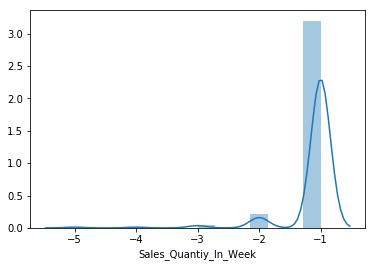

In [23]:
print(neg_sales['Sales_Quantiy_In_Week'].unique())
print(neg_sales.Sales_Quantiy_In_Week.value_counts())
sns.distplot(neg_sales['Sales_Quantiy_In_Week'])

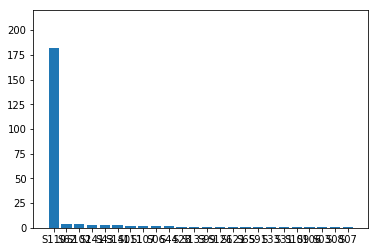

In [54]:
import matplotlib.pyplot as plt
x = neg_sales['Location_Code'].unique()
y = neg_sales['Location_Code'].value_counts()
plt.bar(x, y)
# Limits for the Y axis
plt.ylim(0,220)
# Show graphic
plt.show()

In [53]:
neg_sales['Location_Code'].value_counts()
#neg_sales[neg_sales['Col_PK'] == 5187214]
#sns.distplot(neg_sales['Location_Code'].value_counts(),kde = False)

S110    182
S28       4
S06       4
S133      3
S44       3
S65       3
S43       2
S03       2
S99       2
S107      2
S141      1
S31       1
S62       1
S102      1
S126      1
S08       1
S106      1
S111      1
S07       1
S140      1
S33       1
S91       1
S109      1
S121      1
Name: Location_Code, dtype: int64

In [5]:
#identify all the weeks
all_weeks = summarized_data['Week_Start'].unique()
print(type(all_weeks))
print(len(all_weeks))
print(all_weeks)


<class 'numpy.ndarray'>
49
['2019-11-24' '2020-01-19' '2019-07-28' '2019-12-08' '2019-09-29'
 '2019-10-13' '2020-01-12' '2019-12-29' '2019-06-09' '2019-04-28'
 '2019-09-08' '2020-03-08' '2019-08-11' '2019-05-12' '2019-07-07'
 '2019-04-14' '2019-06-02' '2019-05-26' '2019-12-15' '2019-12-22'
 '2019-11-17' '2019-07-21' '2019-12-01' '2019-05-19' '2019-10-20'
 '2020-01-05' '2019-05-05' '2019-06-16' '2020-03-29' '2019-06-30'
 '2019-08-25' '2020-01-26' '2019-10-06' '2019-11-03' '2019-04-21'
 '2020-03-15' '2019-09-01' '2019-04-07' '2019-07-14' '2019-08-04'
 '2019-10-27' '2019-08-18' '2019-06-23' '2019-11-10' '2019-03-31'
 '2020-03-01' '2019-09-22' '2019-09-15' '2020-03-22']


In [6]:
pos_sales.dtypes

Col_PK                              object
Item_No                              int64
Location_Code                       object
Purchase_MRP                       float64
Prevailing_MRP_as_on_Stock_Date    float64
State                               object
Region                              object
Stock_Quantity                       int64
Days_In_Stock                       object
Week_Start                          object
Month                                int64
Year                                 int64
Store_Code                          object
Store_type                          object
Store_location                      object
City_type                           object
No_                                  int64
Brand                               object
Movement                            object
Case_Material                       object
Watchband_Strap_Type                object
Dial_Color                          object
Case_Shape                          object
Case_Size  

In [7]:
for week in all_weeks:
    #print("Running for : " + str(week))
    curr_week = datetime.strptime(week, '%Y-%m-%d')
    neg_process = neg_sales[neg_sales['Week_Start'] == week]
    prev_week = curr_week - timedelta(days=7)
    prev_week = str(prev_week)[0:10]
    pos_process = pos_sales[pos_sales['Week_Start'] == prev_week]
    zero_process = zero_sales[zero_sales['Week_Start'] == prev_week]
    #print("Previous Week is : " + prev_week)
    #print(neg_process.shape)
    #print(pos_process.shape)
    #print(zero_process.shape)
    #print(neg_process[['Col_PK','Sales_Quantiy_In_Week']])
    
    merged = pd.merge(neg_process[['Col_PK','Sales_Quantiy_In_Week']],pos_process[['Col_PK','Sales_Quantiy_In_Week']],
                      how = 'inner',left_on=["Col_PK"], right_on=["Col_PK"],
                      suffixes= ('_x', '_y')) #, indicator= True)
    merged[['Col_PK','Sales_Quantiy_In_Week_x' ,'Sales_Quantiy_In_Week_y']] = merged[['Col_PK','Sales_Quantiy_In_Week_x' ,'Sales_Quantiy_In_Week_y']].fillna(0)
    #print(merged)
    if merged.empty is False:
        print("Value is present in : ",prev_week)
        print(merged)
        
    
    

Value is present in :  2020-01-12
        Col_PK  Sales_Quantiy_In_Week_x  Sales_Quantiy_In_Week_y
0  5159185_S62                     -1.0                      1.0
Value is present in :  2019-07-21
         Col_PK  Sales_Quantiy_In_Week_x  Sales_Quantiy_In_Week_y
0  5154487_S110                     -1.0                      2.0
1  5127520_S110                     -3.0                      1.0
Value is present in :  2019-09-22
         Col_PK  Sales_Quantiy_In_Week_x  Sales_Quantiy_In_Week_y
0  5127520_S110                     -1.0                      1.0
Value is present in :  2019-10-06
         Col_PK  Sales_Quantiy_In_Week_x  Sales_Quantiy_In_Week_y
0  5132154_S110                     -2.0                      1.0
Value is present in :  2020-01-05
        Col_PK  Sales_Quantiy_In_Week_x  Sales_Quantiy_In_Week_y
0  5121914_S43                     -1.0                      1.0
Value is present in :  2019-08-04
         Col_PK  Sales_Quantiy_In_Week_x  Sales_Quantiy_In_Week_y
0  51602